# Bug
## Description
Our library currently pads the scan (3D Image) to make it a cube. This should also add the appropriate pixels to the points. After this, the function scales the image and points down. Unfortunetly, this causes the points to be in a different visual space than expected.

In [1]:
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np

In [2]:
from ThreeDLabeler.images import Image
from ThreeDLabeler.PreProcessing import tag_parser
from ThreeDLabeler.plotting import mri_point_plot

In [3]:
img475 = nib.load("MouseSkullData/475.mnc")
tag475 = tag_parser("MouseSkullData/475_landmarks.tag")

In [4]:
data475 = img475.get_data()
vox_size_475 = img475.header.get_zooms()
tag475_scaled = tag475 / vox_size_475

In [5]:
data475_scale = Image(voxels=data475, voxel_size=vox_size_475, point_positon=tag475)

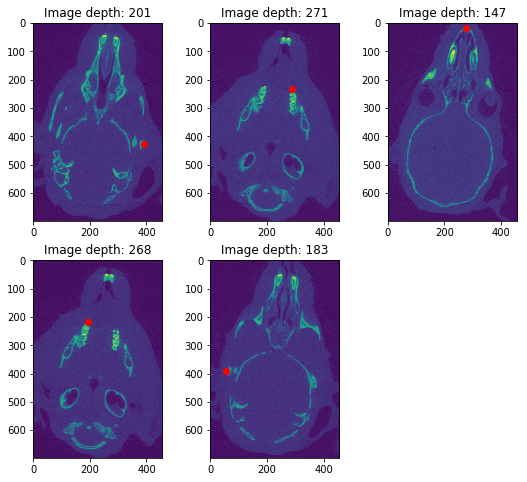

In [6]:
mri_point_plot(img=data475_scale.voxels, df=data475_scale.point_positon) # Un cubed

This is the original/official location of the key points

In [7]:
print(data475_scale.point_positon)
print(data475_scale.voxels.shape)

            x           y           z
0  390.073885  201.407596  426.929610
1  287.661552  271.250371  231.533950
2  278.060859  147.583512   16.314690
3  194.903387  268.331555  219.204848
4   55.136381  183.661229  390.753664
(698, 397, 456)


In [8]:
data475_scale.cube()


In [9]:
print(data475_scale.point_positon)
print(data475_scale.voxels.shape)

            x           y           z
0  511.073885  352.407596  426.929610
1  408.661552  422.250371  231.533950
2  399.060859  298.583512   16.314690
3  315.903387  419.331555  219.204848
4  176.136381  334.661229  390.753664
(698, 698, 698)


In [10]:
df = tag475 / 0.035
df1 = data475_scale.point_positon

 df/

In [11]:
df/(698, 397, 456) * 698

,x,y,z
0,390.073885,354.112096,653.501903
1,287.661552,476.908712,354.409423
2,278.060859,259.479323,24.972925
3,194.903387,471.776890,335.537246
4,55.136381,322.910675,598.127319


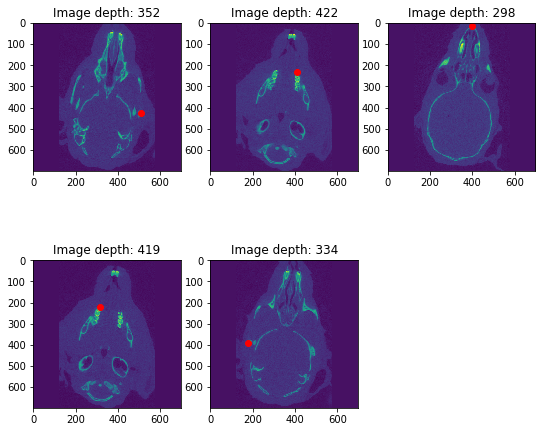

In [12]:
mri_point_plot(img=data475_scale.voxels, df=data475_scale.point_positon) # Cubed

We can see here that the `cube` function is the issue but to double check the scale function we will do the same analysis.

In [13]:
data475_scale.scale(128) 

In [14]:
print(data475_scale.point_positon)
print(data475_scale.voxels.shape)

           x          y          z
0  93.721286  64.624889  78.290817
1  74.940800  77.432733  42.458948
2  73.180215  54.754570   2.991806
3  57.930707  76.897477  40.198024
4  32.300081  61.370541  71.656832
(128, 128, 128)


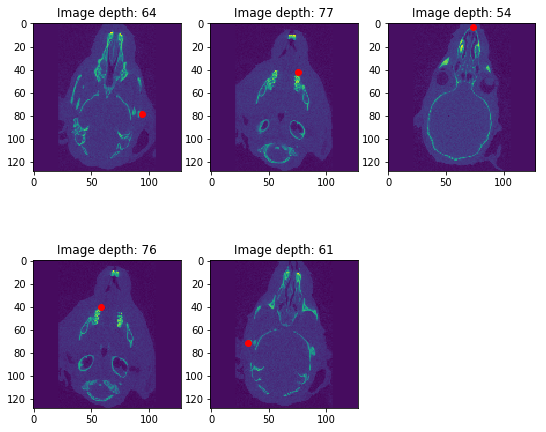

In [15]:
mri_point_plot(img=data475_scale.voxels, df=data475_scale.point_positon) # Scaled

So the issue is obviously the scalling cubing. Must fix the issue

In [19]:
%%time
data475_scale1 = Image(voxels=data475, voxel_size=vox_size_475, point_positon=tag475)
data475_scale1.cube()
data475_scale1.scale(128)

CPU times: user 17.5 s, sys: 4.07 s, total: 21.6 s
Wall time: 19.1 s


This will take around 3 hours to complete. Maybe there is a way to speed this up but its only a one time operation.

In [22]:
21*500/60/60

2.9166666666666665